# Gradient Descent

The Adaline (Adaptive Linear Element) learning algorithm is a fundamental concept in machine learning. This algorithm uses a linear activation function ($\Phi$) and aims to minimize the mean squared error. Unlike the perceptron, which works based on a threshold, Adaline minimizes the mean squared error of a linear function's outcome. The learning process involves adjusting weights and thresholds using the _Gradient Descent_ method.

The key difference between Adaline and the perceptron lies in their learning rules. Adaline follows a batch algorithm, while the perceptron uses an online learning scheme. The goal of Adaline is to find optimal weight vectors that minimize the squared error across all training samples, leading to efficient convergence in solving __classification problems__.


## Data generation

The initial setup of this algorithm is nearly identical to others' initial setup. The comments provided on the Python code should be auto-explanatory, but you can see the [PLA-improved notebook](https://github.com/imAlessas/neural-networks/blob/main/algorithms/perceptron/PLA-improved.ipynb) where you can find the _initial setup_ properly explained.

[ 0.63441191 -0.34712996 -0.589759  ]
Norm of w: 0.9331630931514059


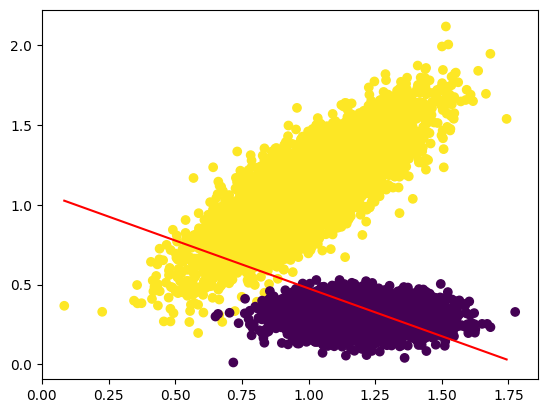

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(22)

# generate N points per class
N = 5000

# first components of X1 and X2
X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
X2_1 = X1_1 + np.random.normal(loc = 0, scale = 0.15, size=N) + 0.1

# generate labels
Y1 = np.ones(N)

# second components of X1 and X2
X1_2 = 2 * np.random.normal(loc=0.6, scale=0.07, size=N)
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N) - 0.3 #X1 * 2 + np.random.normal(loc = 0, scale = 0.1, size=N)

# generate labels
Y2 = -np.ones(N)

# plots the components
# plt.scatter(X1_1, X2_1)
# plt.scatter(X1_2, X2_2)

# generates weight vector w_0,....,w_n
w = np.random.uniform(low=-1,size=3)
#w = w / np.linalg.norm(w)

print(w)
print("Norm of w: " + str(np.linalg.norm(w)))

# Plots the hyperplane
plt.plot([np.min(X1_1), np.max(X1_1)],
        [np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_2) * (-w[1]/w[2]) - w[0]/w[2]],
        color = 'red')


# generate coordinate X0
X0 = np.ones(N * 2)
#X0 = X0[:, np.newaxis]

#  creates the final set of point X1 and X2
X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))

X = np.stack((X0, X1, X2), axis=1)

y = np.concatenate((Y1, Y2))

#X = np.hstack((X0, np.vstack((X1, X2))))
plt.scatter(X[:, 1], X[:, 2], c=y)

# y.shape[0]

### Error function

In this case, the error function is the mathematical definition of the _Sum Squared Error_ which translates into the following mathematical summation:

$$
    \frac{1}{2}\sum_{i = 1}^N(\text{e}_i)^2
$$

In [2]:
def error_sse(errors):
    error = np.sum(np.square(errors)) / 2
    return error

## Training script

Before entering the loop to train the Adeline network we generate a weight vector $w$, we set the learning rate $\eta$, and then we initialize the variables <tt>epochs</tt> - which counts the iterations - and <tt>max_epochs</tt> - which is the maximum number of iterations allowed. Then we initialize the array <tt>total_error</tt> which stores for every epoch the number of errors.


In [3]:
#np.random.seed(43)

# generate w_0,....,w_n
w = np.random.uniform(low=-1, high=1, size=3)

# set learning rate 0 < eta < 1
eta = 0.01

# check epochs
epochs = 0

# set maximum epochs
max_epochs = 2000

# track total error per epoch
total_error = np.zeros(max_epochs)

We start iterating until we reach the maximum number of epochs, we compute the <tt>output</tt> of the __activation function__, which in this case is the identity function:

$$
    \Phi(w^Tx) = w^Tx
$$

Secondly, we compute the error as the difference between the output and the labels $y$ and we use it to compute the sum of squared errors.

Remember that the Adaline output is a vector of length $N$ (number of points in the dataset) so the result of $\Phi(w^TX)\,y$ is positive if both of the values are positive or negative. So if _all_ the Adaline outputs are the same sign $y$ then we found a solution. Otherwise, we use the updating rule:

$$
    w_\text{new} = w_\text{old} - \eta\nabla E_\text{IN} \,\,=\,\, w_\text{old} + \eta x^T\,(y - x\,w)
$$

Eventually we increase the number of epochs.

<!-- <tt></tt> -->

In [4]:
while (epochs < max_epochs):
        
    # compute current output
    adaline_output = np.dot(X, w)
    
    # compute error for each data point = y - X^T w
    errors = y - adaline_output
    
    # compute SSE error at this epoch
    total_error[epochs] = error_sse(errors)
    
    
    # check if a solution is found
    if all(adaline_output * y > 0):
        break
    else:
        # update with w = w + delta_w
        # delta_w = eta * 2/n * X^T * (errors)
        # errors = y - X^T w
        delta_w = eta * 2 * np.dot(np.transpose(X), errors) / X.shape[0]
        w = w + delta_w
        
    epochs += 1

After computing the algorithm we can plot the solution found by de Adaline LA. If <tt>max_epochs = 1000</tt> we can observe that most of the points are correctly classified while the minority (some units) are still misclassified. In this situation the GD Adeline LA makes a lot of effort to rotate the hyperplane because the gradient $\nabla E_\text{IN}$ is very close to zero (as we can see from the second graph). By increasing the number of epochs it is possible to obtain a better solution.

Another way to speed up the learning stage is to modify the value of $\eta$, which generally goes from $10^{-2}$ to $10^{-4}$.

[-0.19833031 -1.09141619  1.98796353]
Eta: 0.01
# of epochs:  2000


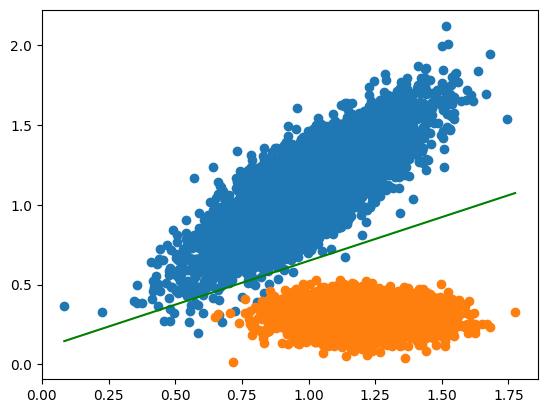

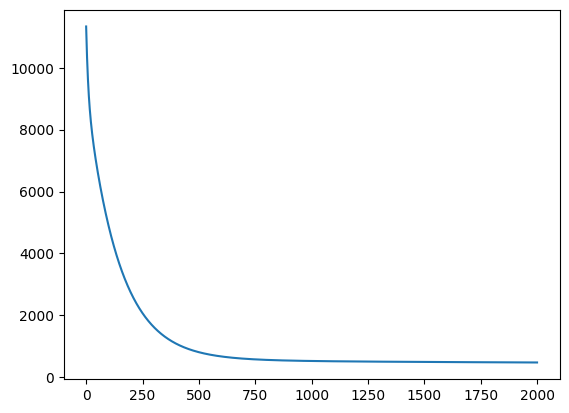

In [5]:
print(w)

# displays the points
plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

print("Eta: " + str(eta))
print("# of epochs: ", epochs)

# plots the hyperplane
plt.plot([np.min(X1), np.max(X1)],
         [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]],
         color = 'green')

# plots the errors
plt.figure()
plt.plot(range(max_epochs), total_error)